In [1]:
# Agregar Librerías
import time #Medir tiempo
import random #Crear valores aleatorios                         
import matplotlib.pyplot as plt #Graficar
import reprlib  #Mostrar caracteres limitados

In [2]:
# Función Crear Matriz de m x n https://www.dreamincode.net/forums/topic/413327-creating-nxm-matrix-without-numpy/
def makeCostMatrix(m,n):
    return [[random.randint(100, 200) for row in range(n)] for column in range(m)]

In [3]:
# Crear Lista de Matrices y Vectores
list_mtx = [0,0,0,0]
list_vct = [0,0,0,0]

# Crear Matrices y Vectores con contenido aleatorio
for w in range(4):
  m = ((w+1)*200) # Dimensiones para filas 
  n = ((w+1)*200) # Dimensiones para columnas
  list_mtx[w] = makeCostMatrix(m,n) # Crear Matriz con contenido aleatorio
  list_vct[w] = makeCostMatrix(n,1) # Crear Vector con contenido aleatorio
  print('Matriz %s' %w) # Nombre de Matriz
  print(reprlib.repr(list_mtx[w])) # Mostrar
  row_mtx = len(list_mtx[w]) # Número de filas
  col_mtx = len(list_mtx[w][0]) # Número de columnas
  print('%s x %s' % (row_mtx,col_mtx)) # Mostrar dimensiones
  print('Vector %s' %w)  # Nombre de Vector
  print(reprlib.repr(list_vct[w])) # Mostrar
  row_vct = len(list_vct[w]) # Número de filas
  col_vct = len(list_vct[w][0]) # Número de columnas
  print('%s x %s' % (row_vct,col_vct)) # Mostrar dimensiones
  print(' ')
print('Lista de Matrices') # Mostrar listas de Matrices y Vectores
print(reprlib.repr(list_mtx))
print(reprlib.repr(list_vct))

Matriz 0
[[159, 107, 134, 106, 146, 197, ...], [188, 160, 160, 167, 187, 197, ...], [157, 144, 163, 139, 160, 200, ...], [102, 160, 187, 149, 138, 169, ...], [113, 114, 121, 113, 170, 149, ...], [116, 131, 169, 146, 104, 168, ...], ...]
200 x 200
Vector 0
[[134], [171], [117], [163], [131], [184], ...]
200 x 1
 
Matriz 1
[[171, 150, 190, 122, 110, 171, ...], [140, 105, 170, 109, 110, 100, ...], [128, 171, 149, 172, 167, 119, ...], [140, 102, 181, 100, 168, 105, ...], [191, 182, 125, 117, 159, 195, ...], [113, 130, 144, 105, 120, 193, ...], ...]
400 x 400
Vector 1
[[169], [161], [102], [184], [149], [172], ...]
400 x 1
 
Matriz 2
[[110, 121, 167, 121, 145, 125, ...], [174, 195, 125, 170, 142, 136, ...], [134, 145, 154, 138, 169, 147, ...], [135, 143, 131, 199, 141, 114, ...], [176, 117, 122, 123, 102, 126, ...], [101, 182, 161, 146, 125, 139, ...], ...]
600 x 600
Vector 2
[[164], [138], [185], [152], [109], [171], ...]
600 x 1
 
Matriz 3
[[132, 181, 125, 126, 117, 199, ...], [154, 187, 

In [4]:
# Función matriz con elementos ceros con filas y columnas específicas
def zeros_matrix(rows, cols):
    """
    Creates a matrix filled with zeros.
        :param rows: the number of rows the matrix should have
        :param cols: the number of columns the matrix should have
 
        :return: list of lists that form the matrix
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    M = []
    while len(M) < rows:
        M.append([])
        while len(M[-1]) < cols:
            M[-1].append(0.0)
 
    return M

In [5]:
# Función para multiplicar dos matrices 
# Row-Major
def matrix_multiply(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
 
    return C

In [6]:
# Se harán mil iteraciones, es decir, mil multiplicaciones para cada caso
# Luego hallar el promedio del tiempo (Tiempo Promedio = Tiempo Total / Iteraciones)
iter = 1000

In [7]:
# Crear una lista para almacenar datos de tiempo
list_time_mul = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt = [0,0,0,0]

In [8]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt[v] = matrix_multiply(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.007140694141387939 seconds
average time: 0.028211007595062256 seconds
average time: 0.06368245649337768 seconds
average time: 0.11429266381263734 seconds


In [9]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt))

[[[4497219], [4591184], [4562305], [4507640], [4599633], [4527560], ...], [[9273279], [9122869], [9241203], [9119182], [8974590], [9150701], ...], [[13781659], [13788294], [13761949], [13541317], [13694398], [13758176], ...], [[18121258], [18137245], [18090332], [18347554], [18312979], [17881840], ...]]


In [10]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul) 

[0.007140694141387939, 0.028211007595062256, 0.06368245649337768, 0.11429266381263734]


#Data Access Optimizations - Loop Interchange

In [11]:
# Función para multiplicar dos matrices con Loop Interchange
# Column-Major
def matrix_multiply_interchange(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    for j in range(colsB):
        for i in range(rowsA):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
 
    return C

In [12]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_inter = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_inter = [0,0,0,0]

In [13]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_inter[v] = matrix_multiply_interchange(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_inter[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.006988709449768067 seconds
average time: 0.02799102067947388 seconds
average time: 0.06343248462677002 seconds
average time: 0.11448118257522583 seconds


In [14]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt_inter))

[[[4497219], [4591184], [4562305], [4507640], [4599633], [4527560], ...], [[9273279], [9122869], [9241203], [9119182], [8974590], [9150701], ...], [[13781659], [13788294], [13761949], [13541317], [13694398], [13758176], ...], [[18121258], [18137245], [18090332], [18347554], [18312979], [17881840], ...]]


In [15]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_inter) 

[0.006988709449768067, 0.02799102067947388, 0.06343248462677002, 0.11448118257522583]


#Data Access Optimizations - Loop Blocking

In [16]:
def matrix_multiply_blocking(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    new_rowsA = int(rowsA/2) 
    new_colsB = int(colsB/2) 
    
    for i in range(new_rowsA):
        for j in range(new_colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA):
        for j in range(new_colsB, colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA, rowsA):
        for j in range(new_colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA, rowsA):
        for j in range(new_colsB, colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    
    return C

In [17]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_block = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_block = [0,0,0,0]

In [18]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_block[v] = matrix_multiply_blocking(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_block[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.007267833232879639 seconds
average time: 0.028464110612869263 seconds
average time: 0.06466898608207702 seconds
average time: 0.1162162697315216 seconds


In [19]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual
print(reprlib.repr(list_rslt_block))

[[[4497219], [4591184], [4562305], [4507640], [4599633], [4527560], ...], [[9273279], [9122869], [9241203], [9119182], [8974590], [9150701], ...], [[13781659], [13788294], [13761949], [13541317], [13694398], [13758176], ...], [[18121258], [18137245], [18090332], [18347554], [18312979], [17881840], ...]]


In [20]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_block) 

[0.007267833232879639, 0.028464110612869263, 0.06466898608207702, 0.1162162697315216]


#Data Layout Optimizations - Array Transpose

In [21]:
def transpose(M):
    """
    Returns a transpose of a matrix.
        :param M: The matrix to be transposed
 
        :return: The transpose of the given matrix
        https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: if a 1D array, convert to a 2D array = matrix
    if not isinstance(M[0],list):
        M = [M]
 
    # Section 2: Get dimensions
    rows = len(M)
    cols = len(M[0])
 
    # Section 3: MT is zeros matrix with transposed dimensions
    MT = zeros_matrix(cols, rows)
 
    # Section 4: Copy values from M to it's transpose MT
    for i in range(rows):
        for j in range(cols):
            MT[j][i] = M[i][j]
 
    return MT

In [22]:
def matrix_multiply_transpose(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    """
    B = transpose(B)
    A = transpose(A)
        # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsB = len(B)
    colsB = len(B[0])
    rowsA = len(A)
    colsA = len(A[0])
    if colsB != rowsA:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsB, colsA)
    for i in range(rowsB):
        for j in range(colsA):
            total = 0
            for ii in range(colsB):
                total += B[i][ii] * A[ii][j]
            C[i][j] = total
 
    return transpose(C)

In [23]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_trans = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_trans = [0,0,0,0]

In [24]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_trans[v] = matrix_multiply_transpose(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_trans[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.021263817071914673 seconds
average time: 0.09333412432670593 seconds
average time: 0.21254191398620606 seconds
average time: 0.3807892909049988 seconds


In [25]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt_trans))

[[[4497219], [4591184], [4562305], [4507640], [4599633], [4527560], ...], [[9273279], [9122869], [9241203], [9119182], [8974590], [9150701], ...], [[13781659], [13788294], [13761949], [13541317], [13694398], [13758176], ...], [[18121258], [18137245], [18090332], [18347554], [18312979], [17881840], ...]]


In [26]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_trans) 

[0.021263817071914673, 0.09333412432670593, 0.21254191398620606, 0.3807892909049988]


In [27]:
# Lista de dimensiones de entradas
list_input = ['200','400','600','800']

In [28]:
print('Input        ' + '%s' %list_input)
print('Multiply:    ' + '%s' %list_time_mul)
print('Interchange: ' + '%s' %list_time_mul_inter)
print('Blocking:    ' + '%s' %list_time_mul_block)
print('Transpose:   ' + '%s' %list_time_mul_trans)

Input        ['200', '400', '600', '800']
Multiply:    [0.007140694141387939, 0.028211007595062256, 0.06368245649337768, 0.11429266381263734]
Interchange: [0.006988709449768067, 0.02799102067947388, 0.06343248462677002, 0.11448118257522583]
Blocking:    [0.007267833232879639, 0.028464110612869263, 0.06466898608207702, 0.1162162697315216]
Transpose:   [0.021263817071914673, 0.09333412432670593, 0.21254191398620606, 0.3807892909049988]


In [29]:
print('Comprobar igualdad de multiplicaciones')
print('Multiply:    ' + '%s' %list_rslt)
print('Interchange: ' + '%s' %list_rslt_inter)
print('Blocking:    ' + '%s' %list_rslt_block)
print('Transpose:   ' + '%s' %list_rslt_trans)

Comprobar igualdad de multiplicaciones
Multiply:    [[[4497219], [4591184], [4562305], [4507640], [4599633], [4527560], [4576743], [4594158], [4662456], [4489566], [4557360], [4580949], [4517103], [4593680], [4588907], [4527934], [4485264], [4429941], [4596349], [4616181], [4558035], [4482906], [4571061], [4471577], [4567877], [4619342], [4755457], [4565409], [4523489], [4486615], [4565527], [4501949], [4496723], [4491168], [4530268], [4513424], [4556449], [4567855], [4589314], [4608447], [4471657], [4583556], [4570700], [4377683], [4476865], [4421376], [4379079], [4536108], [4596697], [4603554], [4621665], [4631726], [4506351], [4551423], [4381871], [4558304], [4501538], [4643320], [4587383], [4533623], [4537661], [4532062], [4555890], [4616317], [4488776], [4552247], [4471324], [4604902], [4543802], [4537835], [4518171], [4421392], [4425292], [4488073], [4555866], [4562056], [4560241], [4468448], [4536076], [4495728], [4592821], [4473725], [4610014], [4599722], [4606995], [4552337], 

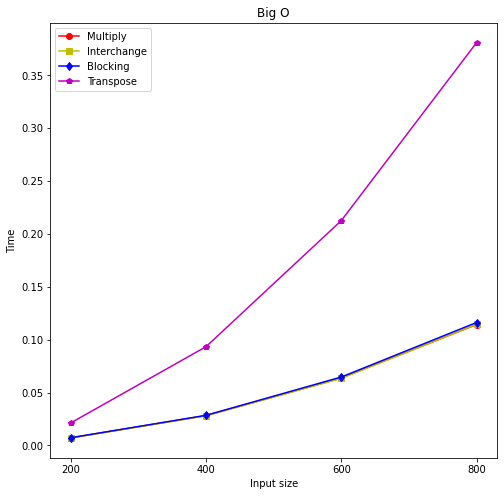

In [30]:
plt.figure(figsize=(8, 8))
plt.plot(list_input, list_time_mul, 'r-o', label='Multiply')
plt.plot(list_input, list_time_mul_inter, 'y-s', label='Interchange')
plt.plot(list_input, list_time_mul_block, 'b-d', label='Blocking')
plt.plot(list_input, list_time_mul_trans, 'm-p', label='Transpose')
#plt.plot(sizes, tos, 'c-o', label='Os')
plt.title('Big O')
plt.xlabel('Input size')
plt.ylabel('Time')
plt.legend()
plt.show()